# Combinatorial Analysis and Counting Fundamentals

In [1]:
%%html
<link rel="stylesheet" type="text/css" href="../styles/styles.css">

In [2]:
# import libraries
import numpy as np # numeric calculations
import pandas as pd # dataframe
# plotting and viz
import matplotlib.pyplot as plt
import seaborn as sns
# combinatorial
from itertools import permutations, combinations, combinations_with_replacement, product
from scipy.special import comb, perm
# random number generation
import random
from collections import Counter
from collections import defaultdict
from  pprint import pprint
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML, display

In [3]:
# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
import sys
from pathlib import Path

# Add the "resources" directory to the path
project_root = Path().resolve().parent.parent
resources_path = project_root / 'resources'
sys.path.insert(0, str(resources_path))

In [5]:
from counting_utils import (visualize_permutation_graph, generate_stars_and_bars_table)

<div class="alert alert-info">
<h4>🎯 What's the probability of getting a pair in 5-card poker?</h4>
<p>Do you know the game of <strong>Poker</strong> with 52 cards?</p>

<p>A <strong>poker hand</strong> in classic poker (without jokers or added cards) consists of 5 cards that a player forms. These card combinations can have different strengths. The strength of combinations is related to the probability of having that type of hand.</p>

<p>Note that the <strong>suit of a card</strong> refers to: spades ♠, clubs ♣, diamonds ♦, or hearts ♥.</p>

<p>The <strong>rank of a card</strong> refers to its value, its hierarchical level. The order of cards by increasing strength is: Two (2), Three (3), Four (4), Five (5), Six (6), Seven (7), Eight (8), Nine (9), Ten (10), Jack (J), Queen (Q), King (K), Ace (A).</p>

<p><strong>A pair</strong> is a combination formed by <em>two cards of the same rank</em> and three other cards such that:</p>
<ul>
<li>their <em>rank is different from that of the pair</em>;</li>
<li>their <em>ranks are different from each other</em>.</li>
</ul>

<p>Here's an example of a pair: this pair is defined by two jacks (two cards of the same rank) and 3 other cards different in rank that is also different from the pair (3, 9, K), i.e.: 3 ≠ 9 ≠ K ≠ J.</p>

<center>
<span style='font-size:100px; color:red'>&#x1F0BB; </span>
<span style='font-size:100px;'>&#x1F0DB;  &#x1F0DE; &#x1F0A9; </span> 
<span style='font-size:100px; color:red'> &#x1F0B3;</span>
</center>

<p><strong>What is the probability of getting a pair?</strong></p>

(A) <5%
(B) between 5% and 10%
(C) between 10% and 20%
(D) between 20% and 40%
(E) >40%
</div>

> How do we calculate the number of possible configurations, realizable events, favorable events, etc.?

Often it involves enumerating certain combinatorial objects - this is called **COUNTING**.

## Without Repetition

### Permutations without repetition

Consider an example of card ordering. Imagine in a card hame you''ve got the following hand:
<center>
<span style='font-size:50px; color:red;'>&#x1F0B6;</span>
<span style='font-size:50px; color:black;'>&#x1F0D9;</span>
<span style='font-size:50px; color:black;'>&#x1F0DD;</span>
<span style='font-size:50px; color:red;'>&#x1F0C5;</span>
</center>

In how many ways can we order / arrange these 4 cards?

In [6]:
# 4 available cards
cards = ['6♥', '9♣', 'Q♣', '5♦']
print(f"Original set: {cards}")

Original set: ['6♥', '9♣', 'Q♣', '5♦']


In [7]:
# Generate all permutations
all_perms = list(permutations(cards))
for i, p in enumerate(all_perms):
    print(f"  {i+1}: {list(p)}")

  1: ['6♥', '9♣', 'Q♣', '5♦']
  2: ['6♥', '9♣', '5♦', 'Q♣']
  3: ['6♥', 'Q♣', '9♣', '5♦']
  4: ['6♥', 'Q♣', '5♦', '9♣']
  5: ['6♥', '5♦', '9♣', 'Q♣']
  6: ['6♥', '5♦', 'Q♣', '9♣']
  7: ['9♣', '6♥', 'Q♣', '5♦']
  8: ['9♣', '6♥', '5♦', 'Q♣']
  9: ['9♣', 'Q♣', '6♥', '5♦']
  10: ['9♣', 'Q♣', '5♦', '6♥']
  11: ['9♣', '5♦', '6♥', 'Q♣']
  12: ['9♣', '5♦', 'Q♣', '6♥']
  13: ['Q♣', '6♥', '9♣', '5♦']
  14: ['Q♣', '6♥', '5♦', '9♣']
  15: ['Q♣', '9♣', '6♥', '5♦']
  16: ['Q♣', '9♣', '5♦', '6♥']
  17: ['Q♣', '5♦', '6♥', '9♣']
  18: ['Q♣', '5♦', '9♣', '6♥']
  19: ['5♦', '6♥', '9♣', 'Q♣']
  20: ['5♦', '6♥', 'Q♣', '9♣']
  21: ['5♦', '9♣', '6♥', 'Q♣']
  22: ['5♦', '9♣', 'Q♣', '6♥']
  23: ['5♦', 'Q♣', '6♥', '9♣']
  24: ['5♦', 'Q♣', '9♣', '6♥']


So, we get 24 options.

Let's consider another example: 

Let $E = \{a,b,c\}$ be a set of letters. How many 3-letter words can be created where all the letters are distinct?

In [8]:
# example 2
elements = ['a', 'b', 'c']
perms_abc = list(permutations(elements))
print(f"All permutations of {elements}:")
for i, p in enumerate(perms_abc):
    print(f"  {i+1}: {''.join(p)}")

All permutations of ['a', 'b', 'c']:
  1: abc
  2: acb
  3: bac
  4: bca
  5: cab
  6: cba


The reasoning can be represented in a form of a tree:

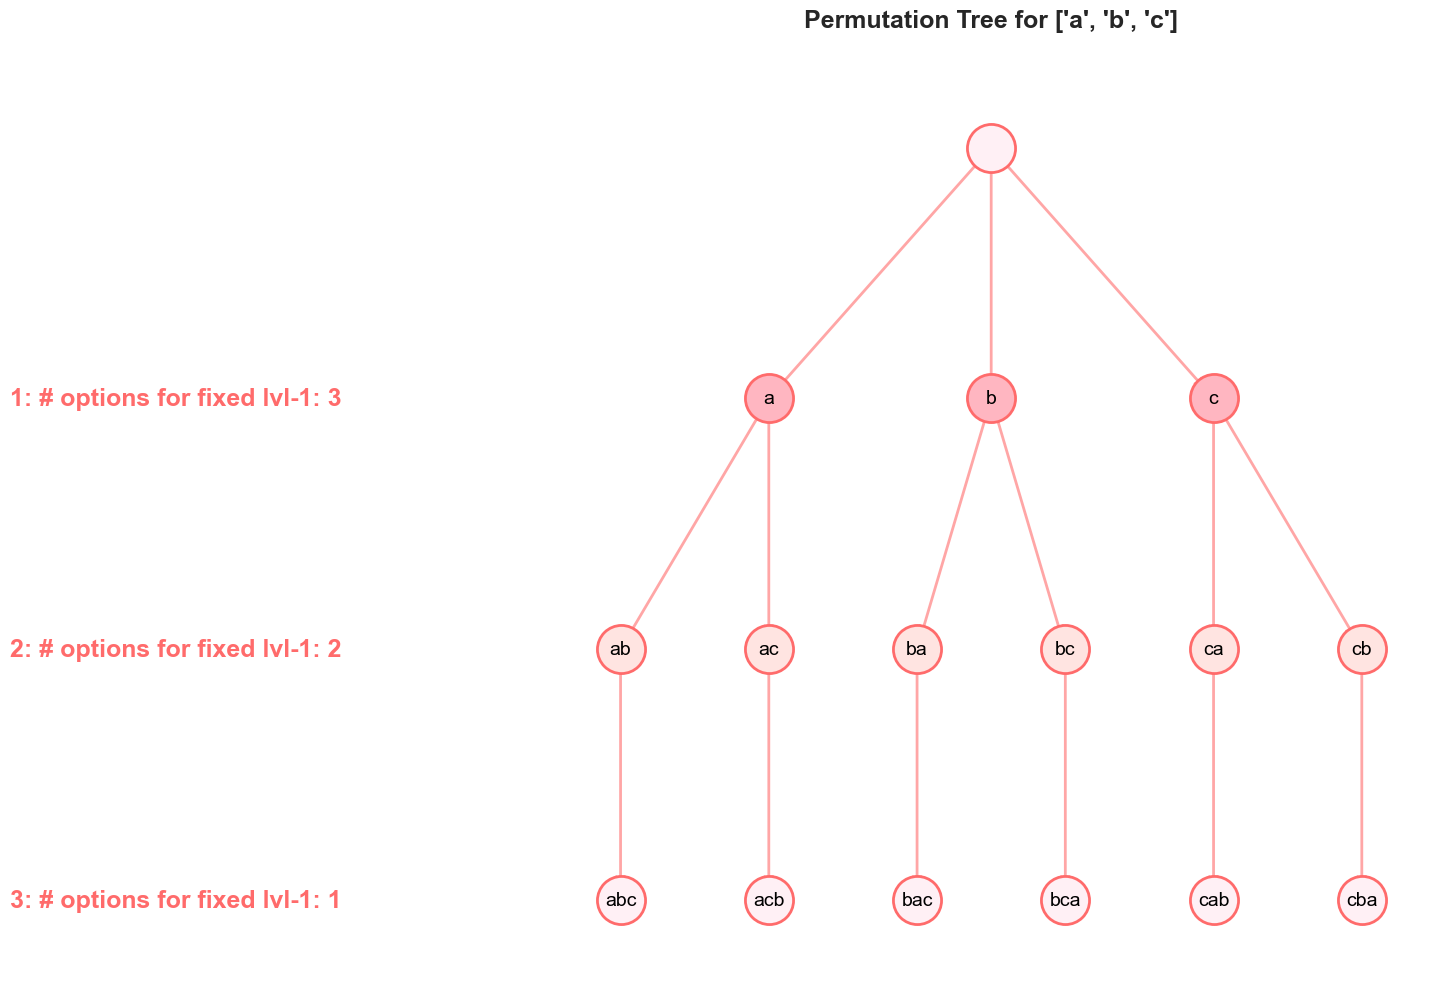

In [9]:
visualize_permutation_graph(elements)

Thus, we obtain $n = 3 \times 2 \times 1$ or in other words $3!$ options.

<div class="alert alert-success">
<h4> Definition: Permutation</h4>
A <strong>permutation</strong> of <em>n</em> elements is any ordered arrangement of these <em>n</em> elements.

<h5>Properties of Permutations</h5>
<ol><li>The elements in permutations of the same set <em>E</em> are identical.</li>
<li>The number of permutations of a set with <em>n</em> elements is: <em>n! = 1×2×...×n</em></li>
</ol>
</div>

<div class="alert-exercise">
<h5> QUESTION:</h5> Write python function that calculates the factorial of a given number.

```
def factorial_custom(n: int) -> int:
    """
    Calculates the factorial of a given non-negative integer n and returns it as a result.
        
    Args:
        n (int): non-negative integer for which the factorial should be calculated
    Returns:
        the factorial of n
    """
```
</div>

In [10]:
# ANSWER 
def factorial_custom(n: int) -> int:
    """
    Calculates the factorial of a given non-negative integer n and returns it as a result.
    
    Args:
        n (int): non-negative integer for which the factorial should be calculated
    Returns:
        the factorial of n
    """
    if n <= 1:
        return 1
    
    f = n * factorial_custom(n - 1)
    return f

<div class="alert-exercise">
<h5> QUESTION:</h5> Write python function that calculates the number of permutations for a given number of elements. Apply to our toy examples of three letters.
</div>

</div>

In [11]:
# ANSWER
def permutations_count(n: int) -> int:
    """
    Calculates and returns the number of permutations P = n! in a set of size n.
    
    Args:
        n (int): number of elements in a set
    Returns:
        the number of permutations
    """
    p = 0
    if n > 0:
        p = factorial_custom(n)
    return p
    

In [12]:
# ANSWEr
permutations_count(len(elements))

6

It is also possible to use [`scipy.special.perm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.perm.html) to get the number of permutations:

In [13]:
n = len(elements)
print(f"# permutations of {elements}: {perm(n, n, exact=True)}")

# permutations of ['a', 'b', 'c']: 6


### $k$-permutations of $n$ (Arrangements) without Repetition

Let's consider the following example. 

4 students (Karine, Michel, Kevin, and Amélie) take part in INSA Cross race. How many ways to determine 1st and 2nd place?

All arrangements of 2 from 4 of ['Karine', 'Michel', 'Kevin', 'Amélie']:
  1: Karine, Michel
  2: Karine, Kevin
  3: Karine, Amélie
  4: Michel, Karine
  5: Michel, Kevin
  6: Michel, Amélie
  7: Kevin, Karine
  8: Kevin, Michel
  9: Kevin, Amélie
  10: Amélie, Karine
  11: Amélie, Michel
  12: Amélie, Kevin


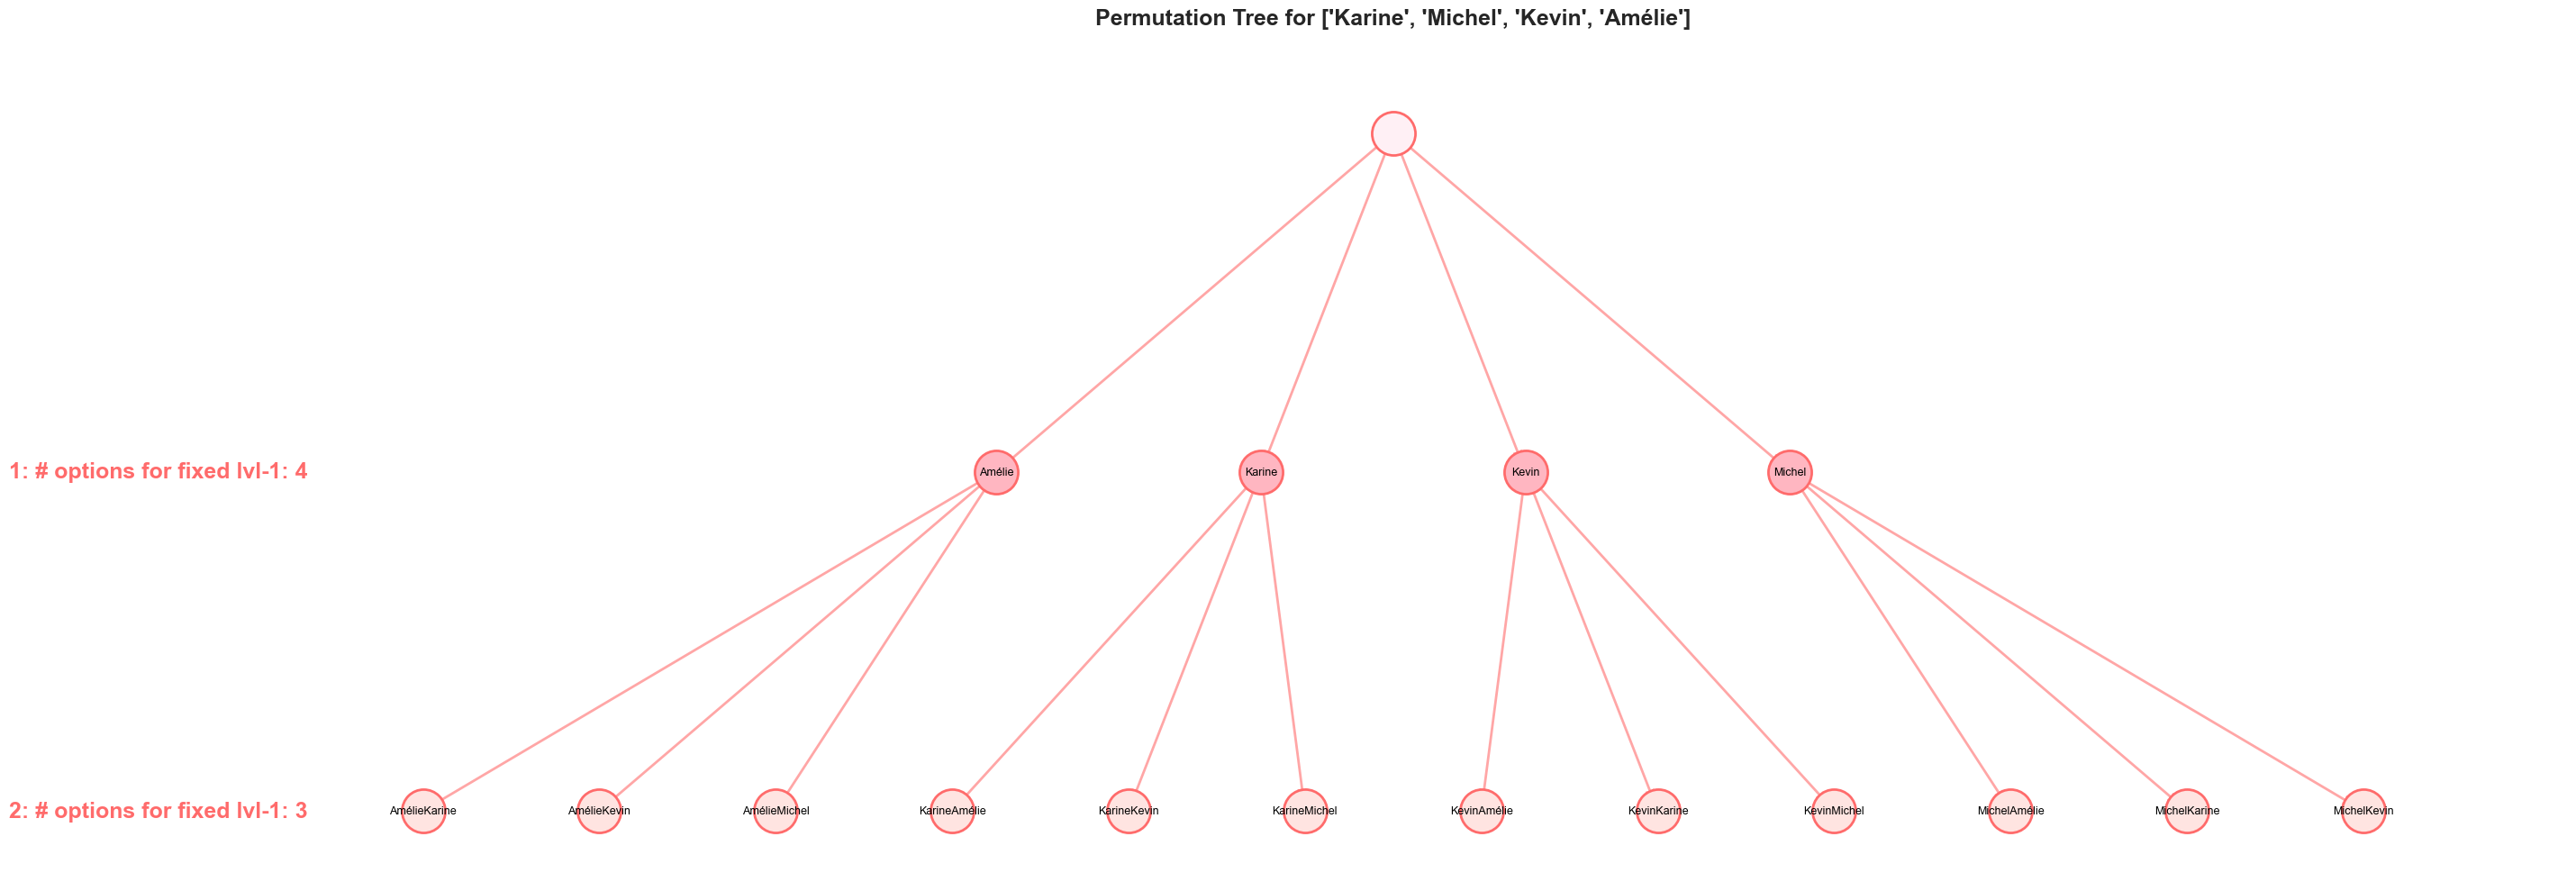

In [14]:
# arrangements example
participants = ['Karine', 'Michel', 'Kevin', 'Amélie']
arrangements_2_from_4 = list(permutations(participants, 2))

print(f"All arrangements of 2 from 4 of {participants}:")
for i, p in enumerate(arrangements_2_from_4):
    print(f"  {i+1}: {', '.join(p)}")

visualize_permutation_graph(participants, k=2)

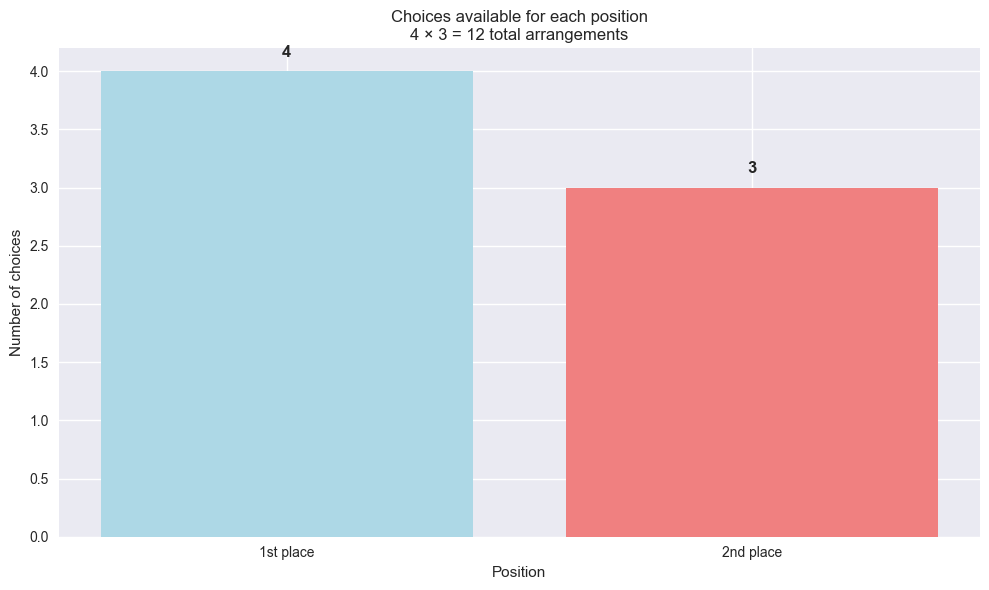

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
positions = [1, 2]
choices = [4, 3]
ax.bar(positions, choices, color=['lightblue', 'lightcoral'])
ax.set_xlabel('Position')
ax.set_ylabel('Number of choices')
ax.set_title('Choices available for each position\n4 × 3 = 12 total arrangements')
ax.set_xticks(positions)
ax.set_xticklabels(['1st place', '2nd place'])
for i, v in enumerate(choices):
    ax.text(positions[i], v + 0.1, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<h4>Definition: Arrangement without repetition</h4>
<p>An <strong>arrangement without repetition</strong> (k-permutation) of <em>k</em> elements among <em>n</em> elements of set <em>E</em> is any ordered arrangement of these <em>k</em> elements.</p>

<h5>Properties of Arrangements</h5>
<ol>
<li>An arrangement without repetition of <em>n</em> elements taken from <em>n</em> elements (<em>A(n,n)</em>) is a permutation.</li>
<li>The number of arrangements without repetition of k elements among n elements: 

$$A(n,k) =\frac{n!}{(n-k)!} = n\times(n-1)\times...\times(n-k+1)$$
</li>
</ol>
</div>

<div class="alert-exercise">
<h5> QUESTION:</h5> Modify the function `permutations_count()` to calculate the number of k-permutation. If $k = n$, then the number of permutations is calculated. Test it on our toy example of Cross INSA.
</div>

In [16]:
# ANSWER
def permutations_count(n: int, k:int=None) -> int:
    """
    Calculates and returns the number of k-permutations A = n!/(n-k)! in a set of size n.
    
    Args:
        n (int): number of elements in a set
        k (int): number of elements taken. Default None. If None, then k = n.
    Returns:
        the number of permutations
    """
    p = 0
    if k is None:
        k = n
    if n > 0:
        p = factorial_custom(n) / factorial_custom(n-k)
    return p

In [17]:
# ANSWER
permutations_count(len(participants), k=2)

12.0

### Combinations without Repetition

Let's consider the following example:

4 students (Karine, Michel, Kevin, and Amélie) take part in INSA Cross race. Two people receive white t-shirts. How many possibilities?

**Attention!** in this case, the order DOES NOT MATTER! i.e. *Karine & Michel = Michel & Karine*

In [18]:
print(f"participants: {participants}")
combinations_2_from_4 = list(combinations(participants, 2))
print(f"All possible combinations for 2 white t-shirt recipients:")
for i, c in enumerate(combinations_2_from_4):
    print(f"  {i+1}: {c[0]} & {c[1]}")

participants: ['Karine', 'Michel', 'Kevin', 'Amélie']
All possible combinations for 2 white t-shirt recipients:
  1: Karine & Michel
  2: Karine & Kevin
  3: Karine & Amélie
  4: Michel & Kevin
  5: Michel & Amélie
  6: Kevin & Amélie


Now, let's consider the following example.

Let $E = \{a, b, c, d\}$. Let's compare two things:
1. how many possibilities are there to form 3-letter words? $\Rightarrow$ ORDER MATTERS
2. how many possibilities are there to select 3 letters? $\Rightarrow$ ORDER DOESN'T MATTER

In [19]:
elements_abcd = ['a', 'b', 'c', 'd']
# ARRANGEMENTS of 3
perms_abcd = list(permutations(elements_abcd, 3))
print(f"All 3-permutations of {elements_abcd}:")
for i, p in enumerate(perms_abcd):
    print(f"  {i+1}: {''.join(p)}")

All 3-permutations of ['a', 'b', 'c', 'd']:
  1: abc
  2: abd
  3: acb
  4: acd
  5: adb
  6: adc
  7: bac
  8: bad
  9: bca
  10: bcd
  11: bda
  12: bdc
  13: cab
  14: cad
  15: cba
  16: cbd
  17: cda
  18: cdb
  19: dab
  20: dac
  21: dba
  22: dbc
  23: dca
  24: dcb


We obtain 24 arrangements (3-permutations of 4 elements).

Note that we can group the 3-permutations elements by the letters forming them:

In [20]:
# Group permutations by their sorted elements (canonical form)
grouped_perms = defaultdict(list)
for p in perms_abcd:
    # Use sorted tuple as key to group permutations with same elements
    key = ''.join(sorted(p))
    grouped_perms[key].append(''.join(p))

pprint(grouped_perms)

defaultdict(<class 'list'>,
            {'abc': ['abc', 'acb', 'bac', 'bca', 'cab', 'cba'],
             'abd': ['abd', 'adb', 'bad', 'bda', 'dab', 'dba'],
             'acd': ['acd', 'adc', 'cad', 'cda', 'dac', 'dca'],
             'bcd': ['bcd', 'bdc', 'cbd', 'cdb', 'dbc', 'dcb']})


We can see that the items `['abc', 'acb', 'bac', 'bca', 'cab', 'cba']` are all permutations of a set of 3 elements `\{a, b, c\}`. The number of such permutations is equal to $3! = 3\times 2 = 6$.

To obtain the number of possibilities to select 3 letters (question 2), we can divide the number of arrangements of 3 from 4 (question 1) by the number of permutations of 3, i.e.:
$$C(n, k) = C^4_3 = \frac{A^3_4}{3!} = \frac{24}{6} = 4$$

This demonstrates the relation between combinations and permutations.

<div class="alert alert-success">
<h4>Definition: Combination without repetition</h4>
<p>A <strong>combination without repetition</strong> of <em>k</em> elements among <em>n</em> elements of set <em>E</em> is any <strong>unordered</strong> arrangement of these <em>k</em> elements. A common way to read it is <i>"n choose k"</i>.</p>

<h5>Properties of Combinations</h5>
<ol>
<li>Two combinations are different if they contain at least one different element.</li>
<li>The number of combinations without repetition of k elements among n elements: 

$$C(n, k) = C_k^n = \left(\begin{matrix}n \\ k\end{matrix}\right) = \frac{n!}{k!(n-k)!} = \frac{A_n^k}{k!}$$

</li>
<li><strong>Symmetry:</strong> 

$$C(n,k) = C(n,n-k)$$

</li>
<li><strong>Single choice:</strong> 

$$C(n,1) = C(n,n-1) = n$$
</li>
<li><strong>Pascal's identity:</strong> 

$$C(n,k) = C(n-1,k-1) + C(n-1,k)$$
</li>
<li><strong>Hockey stick identity:</strong> 

$$C(n,k) + C(n,k+1) = C(n+1,k+1)$$
</li>
<li><strong>Binomial theorem:</strong> 

$$(a+b)^n = \sum_{k=0}^n C(n,k) \times a^k \times b^{n-k}$$
</li>
</ol>
</div>

**Proofs**

1. Symmetry, $C(n,k) = C(n,n-k)$

$$C(n,n-k) = \frac{n!}{(n-k)!(n-(n-k)!)} = \frac{n!}{(n-k)!k!} = C(n,k)$$

2. Single choice, $C(n,1) = C(n,n-1) = n$

$$C(n,1) = \frac{n!}{1!(n-1)!} = n$$
$$C(n,n-1) = \frac{n!}{(n-1)!1!} = n$$

3. Pascal's identity, $C(n,k) = C(n-1,k-1) + C(n-1,k)$

$$C(n-1, k-1) = \frac{(n-1)!}{(k-1)! \left((n-1) - (k-1)\right)!} = \frac{(n-1)!}{(k-1)! \left(n- k\right)!}$$

$$C(n-1,k) = \frac{(n-1)!}{k! \left((n-1) - k)\right)!} = \frac{(n-1)!}{k! \left(n- k-1\right)!}$$

Then:

$$C(n-1, k-1) + C(n-1,k) = \frac{(n-1)!}{(k-1)! \left(n- k\right)!} + \frac{(n-1)!}{k! \left(n- k-1\right)!} = \frac{(n-1)!}{(k-1)! \left(n- k-1\right)!}\left(\frac{1}{n-k} + \frac{1}{k}\right) =$$

$$= \frac{(n-1)!}{(k-1)! \left(n- k-1\right)!}\left(\frac{k}{(n-k)k} + \frac{n-k}{k(n-k)}\right) = \frac{(n-1)!}{(k-1)! \left(n- k-1\right)!}\times \frac{k + n - k}{(n-k)k} =$$

$$ = \frac{(n-1)!}{(k-1)! \left(n- k-1\right)!}\times \frac{n}{(n-k)k} = \frac{(n-1)!\times n}{\left((k-1)!\times k\right) \left((n- k-1)!\times (n-k)\right)} = \frac{n!}{k!(n-k)!} = C(n,k)$$

4. Hockey stick identity, $C(n,k) + C(n,k+1) = C(n+1,k+1)$

$$C(n,k) + C(n,k+1) = \frac{n!}{k!(n-k)!} + \frac{n!}{(k+1)!(n-(k+1))!} = \frac{n!}{k!(n-k-1)!}\times \left(\frac{1}{n-k} +\frac{1}{k+1}\right) =$$

$$=\frac{n!}{k!(n-k-1)!}\times \left(\frac{k+1}{(n-k)(k+1)} + \frac{n-k}{(k+1)(n-k)}\right) = \frac{n!}{k!(n-k-1)!}\times \left(\frac{k+1 + n-k}{(n-k)(k+1)}\right) =$$

$$= \frac{n!}{k!(n-k-1)!}\times \frac{n+1}{(n-k)(k+1)} = \frac{n!\times (n+1)}{\left(k!\times (k+1)\right) \left((n-k-1)! \times (n-k)\right)} = \frac{(n+1)!}{(k+1)!(n-k)!} =$$

$$=\frac{(n+1)!}{(k+1)!\left((n+1) - (k+1)\right)!} = C(n+1,k+1)$$

5. Binomial theorem, $(a+b)^n = \sum_{k=0}^n C(n,k) \times a^k \times b^{n-k}$

Let's consider an example of $n=2$:

$$(a+b)^2 = C^0_2 a^0 b^{2-0} + C^1_2 a^1 b^{2-1} + C^2_2 a^2 b^{2-2} = C^0_2 a^0 b^{2} + C^1_2 a^1 b^{1} + C^2_2 a^2 b^{0} = C^0_2 b^{2} + C^1_2 ab + C^2_2 a^2 =$$

$$=\frac{2!}{0!(2-0)!}\times b^2 + \frac{2!}{1!(2-1)!}\times ab + \frac{2!}{2!(2-2)!}\times a^2 = b^2 + 2ab + a^2$$

<div class="alert-exercise">
<h5> QUESTION:</h5> Write the function that calculates the number of combinations of $n$ taken $k$. Apply it to our toy example of Cross INSA participants and t-shirts.
</div>

In [21]:
# ANSWER
def combinations_count(n: int, k:int) -> int:
    """Calculates the number of combinations C(n, k).

    Args:
        n (int): total number of elements
        k (int): number of elements taken

    Returns:
        int: number of combinations C(n, k)
    """
    res = 0
    if n > 0 and k > 0:
        res = factorial_custom(n) / (factorial_custom(k) * factorial_custom(n - k))
    return res
    

In [22]:
# ANSWER
combinations_count(len(participants), 2)

6.0

To calculate the number of combinations, it is also possible to use [`scipy.special.comb`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html):

In [23]:
comb(len(participants), 2, exact=True)

6

<a id='poker-hand-5'></a>
<div class="alert-exercise">
<h5> QUESTION:</h5> A classic poker hand is composed of 5 cards from a 52-card deck. Calculate the number of possibilities to get 5-card hand? Verify using your functions.
</div>



<details> <summary>Reveal solution</summary>
The 5 cards of the hand are all distinct, and the order of cards in the hand does not matter. So, a poker hand can be described as a 5-combination (k = 5) of cards from a 52 card deck (n = 52).

$$C(n, k) = C(52, 5) = \frac{52!}{5!(52 - 5)!} = \frac{52\times 51\times 50\times 49 \times 48 \times 47!}{5!47!} = \frac{52\times 51\times 50\times 49\times 48}{5\times 4 \times 3 \times 2 \times 1} = $$
$$=\frac{52\times 51\times 5\times 49\times 48}{4 \times 3} = \frac{52\times 17\times 5\times 49\times 48}{4} = 13\times 17\times 5\times 49\times 48 = 2598960$$
</details>



In [24]:
13*17*5*49*48

2598960

In [25]:
comb(52, 5, exact=True)

2598960

<div class="alert alert-primary">
<h4>🤖 ML Application Spotlight</h4>
<p><strong>Feature Selection:</strong> In machine learning, when we want to select k features from n available features, we use combinations. For example, if we have 10 features and want to select 3, there are C(10,3) = 120 possible combinations to evaluate.</p>
</div>

## With Repetition

### $k$-permutations (Arrangements) with Repetition

Let's consider the following example:

We need to find a 7-digit code. We know the first three digits are 116. How many options for the remaining 4 digits?

![Code lock with 7 digits](img/code-lock.svg)

Let's focus on the remaining digits. The digits can be the same. So at each position, there are 10 options: 0, 1, 2, 3, 4, 5, 6,7, 8, 9. 

![Code lock with 7 digits. Each position has 10 options](img/code-lock-options.svg)

So, the total number of possibilities is $10^4 = 10000$.

<div class="alert alert-success">
<h4>Definition: Arrangement with repetition</h4>
<p>An <strong>arrangement with repetition</strong> of <em>k</em> elements among <em>n</em> elements of set <em>E</em> is any ordered arrangement of <em>k</em> elements, not necessarily distinct.</p>
<p><strong>Formula:</strong></p>

$$n^k$$

</div>

<div class="alert-exercise">
<h5> QUESTION:</h5> Write a function that calculates the number of k-permutations with repetition. Test it.

```
def arrangements_with_repetition_count(n: int, k:int) -> int:
    """Calculates the number of k-permutations of n with repetition: n^k.

    Args:
        n (int): total number of elements
        k (int): number of elements taken

    Returns:
        int: number of k-permutations with repetition
    """
```
</div>


In [26]:
# ANSWER
def arrangements_with_repetition_count(n: int, k:int) -> int:
    """Calculates the number of k-permutations of n with repetition: n^k.

    Args:
        n (int): total number of elements
        k (int): number of elements taken

    Returns:
        int: number of k-permutations with repetition
    """
    return n ** k

In [27]:
arrangements_with_repetition_count(10, 4)

10000

<div class="alert alert-primary">
<h4>🤖 ML Application Spotlight</h4>
<p><strong>Neural Network Architecture Search:</strong> When designing neural networks, we might have n different layer types and want to create a network with k layers. Each position can have any of the n layer types, giving us n^k possible architectures to explore.</p>
</div>

### Combinations with repetition

Consider the following example:

There are 4 types of vaccines (A, B, C, D). Three people want to be vaccinated. Each person receives one vaccine, possibly of the same type. 
What is the number of possible configurations?

This is equivalent to distributing $k=3$ indistinguishable items into $n=4$ distinguishable categories.

Let's use a visual method (stars and bars) to find a solution:
- Use ★ (stars) to represent the $k$ items we're selecting
- Use | (bars) to separate the $n$ categories
- We need $(n-1)$ bars to create $n$ sections

In our case to create 4 sections corresponding to the types of vaccines, we need 3 bars. 3 stars represent our 3 selections. Total number of symbols to place: 3 + 3 = 6 positions.

The question becomes: 

> How many ways can we arrange 3 stars and 3 bars?

Choose 3 positions for stars from 6 total: $C(6,3) = C(n+k-1, k) = 20$


In [28]:
html_output = generate_stars_and_bars_table(n=4, k=3, show_all=True)
display(HTML(html_output))

No.,Multiset,Eq. solution,Stars and Bars
1,"{1,1,1}","[3,0,0,0]",★★★|||
2,"{1,1,2}","[2,1,0,0]",★★|★||
3,"{1,1,3}","[2,0,1,0]",★★||★|
4,"{1,1,4}","[2,0,0,1]",★★|||★
5,"{1,2,2}","[1,2,0,0]",★|★★||
6,"{1,2,3}","[1,1,1,0]",★|★|★|
7,"{1,2,4}","[1,1,0,1]",★|★||★
8,"{1,3,3}","[1,0,2,0]",★||★★|
9,"{1,3,4}","[1,0,1,1]",★||★|★
10,"{1,4,4}","[1,0,0,2]",★|||★★


We can use [`itertools.combinations_with_replacement`](https://docs.python.org/3/library/itertools.html#itertools.combinations_with_replacement) to list the possibilities:

In [29]:
vaccines = ['A', 'B', 'C', 'D']
comb_abcd_rep = combinations_with_replacement(vaccines, 3)
print(f"All possible combinations for 3 patients getting a vaccines of one of 4 types:")
for i, c in enumerate(comb_abcd_rep):
    print(f"  {i+1}: {c[0]} & {c[1]} & {c[2]}")


All possible combinations for 3 patients getting a vaccines of one of 4 types:
  1: A & A & A
  2: A & A & B
  3: A & A & C
  4: A & A & D
  5: A & B & B
  6: A & B & C
  7: A & B & D
  8: A & C & C
  9: A & C & D
  10: A & D & D
  11: B & B & B
  12: B & B & C
  13: B & B & D
  14: B & C & C
  15: B & C & D
  16: B & D & D
  17: C & C & C
  18: C & C & D
  19: C & D & D
  20: D & D & D


So, we get 20 possibilities.

<div class="alert alert-success">
<h4>Definition: Combination with repetition</h4>
<p>A <strong>combination with repetition</strong> of <em>k</em> elements among <em>n</em> elements of set <em>E</em> (or <strong>multisubset</strong> of size <em>k</em> from a set <em>E</em> of size <em>n</em>) is any unordered set of <em>k</em> elements, not necessarily distinct.</p>
<p><strong>Formula:</strong> 

$$C(n+k-1, k) = \frac{(n+k-1)!}{k!(n-1)!}$$
</p>
</div>

<div class="alert-exercise">
<h5> QUESTION:</h5> Write a function that calculates the number of combinations with repetition. Test it.

```
def combinations_with_repetition_count(n: int, k: int) -> int:
    """Calculates and returns the number of combinations with repetition: C(n+k-1, k) 

    Args:
        n (int): number of types of elements
        k (int): number of elements taken

    Returns:
        int: number of combinations with repetitions
    """
```
</div>


In [30]:
# ANSWER
def combinations_with_repetition_count(n: int, k: int) -> int:
    """Calculates and returns the number of combinations with repetition: C(n+k-1, k) 

    Args:
        n (int): number of types of elements
        k (int): number of elements taken

    Returns:
        int: number of combinations with repetitions
    """
    res = combinations_count(n + k - 1, k)
    return res

In [31]:
# ANSWER
combinations_with_repetition_count(n=4, k=3)

20.0

### Permutations with Repetition

Now, let's modify the problem statement as follows:

There are 10 vaccine doses of 4 types: 2 type A, 3 type B, 4 type C, 1 type D. How many ways to arrange these 10 vaccines for 10 people in queue?

Note that the vaccines of the same type are identical to each other. So, we need to account for overcounting that occurs when identical objects are swapped.

If all objects were different, we would have $n!$ permutations (arrangements). 

However, since some objects are identical, we've overcounted. Consider three vaccines of type B: $B_1, B_2, B_3$. They can be rearranged among themselves in $3!$ ways, but all these arrangements look identical because the objects are indistinguishable: 
$(B_1, B_2, B_3)$, $B_3, B_2, B_1$, $B_1, B_3, B_2$, etc. look the same as $B, B, B$.

For each group $i$ of identical objects: the $n_i$ objects of type $i$ can be permuted among themselves in $n_i!$ ways (all looking the same). 

Since these overcounting factors are independent, we divide by each of them: $\frac{n!}{n_1!n_2!n_3!n_4} = \frac{10!}{2!3!4!1} = \frac{10\times9\times8\times7\times6\times5\times4!}{2!3!4!1} = \frac{10\times9\times8\times7\times6\times5}{2!3!}=\frac{10\times9\times8\times7\times6\times5}{2!3\times 2\times 1} = \frac{10\times9\times8\times7\times5}{2!} = 10\times9\times4\times7\times5 = 12600$

In [32]:
factorial_custom(10) / (factorial_custom(2)*factorial_custom(3)*factorial_custom(4)*factorial_custom(1))

12600.0

<div class="alert alert-success">
<h4>Definition: Permutation with repetition</h4>
<p>Let there be <em>l</em> categories, where elements of set <em>E</em> are distributed among these categories such that <em>n₁+n₂+...+nₗ=n</em>, where <em>nᵢ</em> is the number of elements in category <em>i</em>.</p>
<p>A <strong>permutation with repetition</strong> of <em>n</em> elements distributed in <em>l</em> categories is any ordered arrangement of <em>n</em> elements that contains <em>n_i</em> elements from each category <em>i</em>.</p>
<p><strong>Formula:</strong> 

$$\frac{n!}{n_1! \times n_2! \times ... \times n_l!}$$
</p>

It is also called <strong>multinomial coefficient</strong>, written as:

$$\left(\begin{matrix}n \\ n_1,n_2,...,n_l\end{matrix}\right) = \frac{n!}{n_1! \times n_2! \times ... \times n_l!}$$
</div>

Key distinctions:
- *Permutations with Repetition vs. Regular Permutations*: In regular permutations, all objects are distinct. Here, some are identical.
- *Permutations with Repetition vs. Combinations*: Permutations with repetition still care about order (AABBC ≠ BCAAB), unlike combinations.
- *Permutations with Repetition vs. Arrangements with Repetition*: The latter refers to selecting with replacement (like a code where each position can be any digit). The former refers to arranging a fixed set of objects where some happen to be identical.

## Summary Table

||Without Repetition|With Repetition|
|--|:--:|:--:|
|With Order|$$A(n,k) = \frac{n!}{(n-k)!}$$</br>$$A(n, n) = n!$$|$$n^k$$</br>$$\frac{n!}{n_1!\times n_2!\times...\times n_l!}$$|
|Without Order|$$C(n,k) = \frac{n!}{k!(n-k)!}$$| $$C(n+k-1, k) = \frac{(n+k-1)!}{k!(n-1)!}$$|

## Side Note: Balls and Urns

![Urn with 5 coloured balls](img/urn-balls.svg)

| Problem Statement |An urn contains 5 balls of different colors (red, blue, green, yellow, purple). You draw 3 balls one by one and line them up in order. How many different arrangements are possible?| An urn contains 5 balls of different colors. You draw 3 balls all at once and put them in a bag. How many different selections are possible? | An urn contains 5 balls of different colors. You draw a ball, note its color, put it back, then draw again. You do this 3 times and record the sequence. How many different sequences are possible? |An urn contains unlimited balls of 5 different colors. You draw 3 balls (possibly of the same color). How many different selections are possible?| You have 10 balls: 3 red, 4 blue, 3 green. In how many ways can you arrange all 10 balls in a line?|
|------|------|------|------|------|------|
| Key phrases about order | - "one by one" or "sequentially" → ORDER MATTERS</br> - "line them up" or "arrange in a row" → ORDER MATTERS | - "all at once" or "simultaneously" → ORDER DOESN'T MATTER</br> - "selection" or "choose" or "pick" → ORDER DOESN'T MATTER </br> - "put in a bag" or "form a group" → ORDER DOESN'T MATTER | - "record the sequence" or "in order" → ORDER MATTERS </br> - Can use phrases like "each draw is independent"| - "selection" or "color composition" → ORDER DOESN'T MATTER </br> - "how many of each color" rather than "which specific balls" | - "arrange in a line" → ORDER MATTERS</br> - "3 red, 4 blue, 3 green" → GROUPS of identical items </br> - "all balls" → using everything |
| Order matters?| YES | NO | YES | NO | YES | 
| Key phrases about repetition | - "different colors" or "distinct" → NO REPETITION (each ball used once)</br> - No replacement mentioned → WITHOUT REPETITION | "different colors" → NO REPETITION| "put it back" or "with replacement" → WITH REPETITION | - "return the ball to the urn" or "unlimited balls" → WITH REPETITION </br> - "possibly of the same color" → WITH REPETITION| The items within each color group are indistinguishable |
| Repetition? | NO |  NO | YES | YES | YES |
| Method | **Arrangements (Permutations) Without Repetition** | **Combinations Without Repetition**| **Arrangements With Repetition** | **Combinations With Repetition** | **Permutations With Repetition (Multinomial)**|
| Formula | $$A(n,k) = \frac{n!}{(n - k)!}$$ | $$C(n,k) = \frac{n!}{k!(n - k)!}$$ | $$n^k$$ | $$C(n + k - 1, k)$$ | $$\frac{n!}{n_1!n_2!...n_l!}$$ | 
| Solution | $$A(5,3) = 5!/(5-3)! = 5×4×3 = 60$$ | $$C(5,3) = 5!/(3!×2!) = 10$$ | $$5³ = 125$$ | $$C(5+3-1, 3) = C(7,3) = 35$$ | $$10!/(3!×4!×3!) = 4,200$$ |
| Why (summary) | We care about which ball is first, second, third (order), and we can't reuse balls. | We only care about WHICH balls we got, not the order we got them in.| Each position can be any of the 5 colors (order matters, repetition allowed). | We care about how many balls of each color we selected (e.g., 2 red + 1 blue, or 3 green, or 1 of each of three colors), not the order we drew them in. The repetition comes from being able to select the same color multiple times.| Total arrangements divided by arrangements within identical groups. |


## Fundamental Counting Principle

Consider the following example:

In a restaurant, the menu consists of 3 appetizers, 4 main courses and 2 desserts. If you must choose one from each category, how many different meals are there?

<div style="text-align: center; font-family: Arial, sans-serif;">
  <h3>Restaurant Menu: 3 × 4 × 2 = 24 possible meals</h3>
  
  <!-- Root -->
  <div style="margin: 20px 0;">
    <div style="display: inline-block; background-color: #667eea; color: white; padding: 10px 20px; border-radius: 8px; font-weight: bold;">
      Choose Meal
    </div>
  </div>
  
  <!-- Container for level 1 with proper positioning -->
  <div style="position: relative; margin: 0 auto; width: 800px;">
    <!-- Level 1 Lines: Appetizers -->
    <svg width="800" height="60" style="display: block;">
      <line x1="400" y1="0" x2="200" y2="60" stroke="#FF6B6B" stroke-width="2"/>
      <line x1="400" y1="0" x2="400" y2="60" stroke="#FF6B6B" stroke-width="2"/>
      <line x1="400" y1="0" x2="600" y2="60" stroke="#FF6B6B" stroke-width="2"/>
    </svg>
    
  <div style="display: flex; justify-content: space-around; margin-bottom: 20px;">
      <div style="background-color: #FFE4E1; padding: 10px 15px; border-radius: 8px; border: 2px solid #FF6B6B; width: 120px; text-align: center;">
        Salad
      </div>
      <div style="background-color: #FFE4E1; padding: 10px 15px; border-radius: 8px; border: 2px solid #FF6B6B; width: 120px; text-align: center;">
        Soup
      </div>
      <div style="background-color: #FFE4E1; padding: 10px 15px; border-radius: 8px; border: 2px solid #FF6B6B; width: 120px; text-align: center;">
        Bruschetta
      </div>
    </div>
  </div>
  
  <!-- Level 2: Main Courses -->
  <p style="color: #666; font-style: italic; margin: 20px 0 10px 0;">For each appetizer, 4 main course options:</p>
  
  <div style="position: relative; margin: 0 auto; width: 600px;">
    <svg width="600" height="60" style="display: block;">
      <line x1="100" y1="0" x2="75" y2="60" stroke="#4CAF50" stroke-width="2"/>
      <line x1="100" y1="0" x2="200" y2="60" stroke="#4CAF50" stroke-width="2"/>
      <line x1="100" y1="0" x2="325" y2="60" stroke="#4CAF50" stroke-width="2"/>
      <line x1="100" y1="0" x2="450" y2="60" stroke="#4CAF50" stroke-width="2"/>
    </svg>
    
  <div style="display: flex; justify-content: space-around; margin-bottom: 20px;">
      <div style="background-color: #E8F5E8; padding: 8px 12px; border-radius: 8px; border: 2px solid #4CAF50; font-size: 14px; width: 80px; text-align: center;">
        Pasta
      </div>
      <div style="background-color: #E8F5E8; padding: 8px 12px; border-radius: 8px; border: 2px solid #4CAF50; font-size: 14px; width: 80px; text-align: center;">
        Steak
      </div>
      <div style="background-color: #E8F5E8; padding: 8px 12px; border-radius: 8px; border: 2px solid #4CAF50; font-size: 14px; width: 80px; text-align: center;">
        Fish
      </div>
      <div style="background-color: #E8F5E8; padding: 8px 12px; border-radius: 8px; border: 2px solid #4CAF50; font-size: 14px; width: 80px; text-align: center;">
        Chicken
      </div>
    </div>
  </div>
  
  <!-- Level 3: Desserts -->
  <p style="color: #666; font-style: italic; margin: 20px 0 10px 0;">For each main course, 2 dessert options:</p>
  
  <div style="position: relative; margin: 0 auto; width: 400px;">
    <svg width="400" height="40" style="display: block;">
      <line x1="100" y1="0" x2="125" y2="40" stroke="#F1C40F" stroke-width="2"/>
      <line x1="100" y1="0" x2="275" y2="40" stroke="#F1C40F" stroke-width="2"/>
    </svg>
    
  <div style="display: flex; justify-content: space-around;">
      <div style="background-color: #FFF8E1; padding: 8px 12px; border-radius: 8px; border: 2px solid #F1C40F; font-size: 14px; width: 100px; text-align: center;">
        Ice Cream
      </div>
      <div style="background-color: #FFF8E1; padding: 8px 12px; border-radius: 8px; border: 2px solid #F1C40F; font-size: 14px; width: 100px; text-align: center;">
        Cake
      </div>
    </div>
  </div>
  
  <!-- Calculation explanation -->
  <div style="background-color: #f0f0f0; padding: 15px; border-radius: 8px; margin-top: 30px; max-width: 600px; margin-left: auto; margin-right: auto;">
    <p style="margin: 5px 0;"><strong>Step 1:</strong> Choose 1 appetizer → 3 options</p>
    <p style="margin: 5px 0;"><strong>Step 2:</strong> For EACH appetizer, choose 1 main → 4 options</p>
    <p style="margin: 5px 0;"><strong>Step 3:</strong> For EACH (appetizer, main) pair, choose 1 dessert → 2 options</p>
    <hr style="margin: 10px 0;">
    <p style="margin: 5px 0; font-weight: bold;">Total paths from top to bottom: 3 × 4 × 2 = 24 complete meals</p>
  </div>
</div>

<div class="alert alert-success">
<h4>Definition: Fundamental Counting Principle</h4>

If event <em>E₁</em> can occur in <em>n₁</em> ways, and for each of these ways event <em>E₂</em> can occur in <em>n₂</em> ways, then <em>E₁</em> followed by <em>E₂</em> can occur in the number of ways given by:

$$n_1 \times n_2$$
</div>

Such multiplication counts all possible **pairings** between the choices, ensuring we don't miss any combinations and don't count any twice.

Note that if choices are mutually exclusive alternatives ("*choose A OR choose B*"), we use addition. 

<div class="alert alert-primary">
<h4>🤖 ML Application Spotlight</h4>
<p><strong>Hyperparameter Optimization:</strong> When searching through different combinations of hyperparameters for a machine learning model, we often need to count the number of possible configurations. For example, if we have 3 learning rates, 4 batch sizes, and 2 optimizers to test, we have 3×4×2 = 24 different combinations to evaluate.</p>
</div>

## Return to Opening Challenge

<center>
<!-- Pair cards -->
<span style='font-size:100px; color:red'>&#x1F0BB; </span>
<span style='font-size:100px;'>  &#x1F0DB; </span>
<!-- Other cards -->
<span style='font-size:100px;'>  &#x1F0DE; &#x1F0A9; </span> 
<span style='font-size:100px; color:red'> &#x1F0B3;</span>
</center>

* Total number of cards in a deck: 52
* Number of ranks (values): 13
* Number of suits: 4
* Number of cards of a fixed suit: 4

* Number of ways to get a 5-card hand: 2,598,960 (calculated in the Question [on the number of possibilities to get 5 card-hand from 52 card-deck](#poker-hand-5))

<details>
<summary>Reveal Solution 1</summary>

1. First, we focus on two cards forming a pair:

<center>
<!-- Pair cards with background highlight -->
<span style='display: inline-block; background-color: #fff3cd; padding: 10px; border-radius: 10px; margin-right: 5px;'>
    <span style='font-size:100px; color:red'>&#x1F0BB; </span>
    <span style='font-size:100px;'>  &#x1F0DB; </span>
</span>
<!-- Vertical separator -->
<span style='font-size:100px; color: #888; margin: 0 10px;'>|</span>
<!-- Other cards -->
<span style='font-size:100px;'>  &#x1F0DE; &#x1F0A9; </span> 
<span style='font-size:100px; color:red'> &#x1F0B3;</span>
</center>

Conditions:
- 2 cards of the same rank
- 2 cards of different suit

> How many ways to select 2 cards of different suit?

Here, the order DOES NOT matter.

* ♠ & ♥
* ♠ & ♦
* ♠ & ♣
* ♥ & ♦
* ♥ & ♣
* ♣ & ♦

Answer: $C(4, 2) = \frac{4!}{2!2!} = 6$

> How many ways to select a rank?

A, K, Q, J, 10, 9, 8, 7, 6, 5, 4, 3, 2

Answer: 13

> (TOTAL) How many ways to create a pair?

Answer: $C(4, 2) \times C(13, 1) = 6\times 13 = 78$

2. Second, we focus on the remaining 3 cards.

<center>
<!-- Pair cards -->
<span style='font-size:100px; color:red'>&#x1F0BB; </span>
<span style='font-size:100px;'>  &#x1F0DB; </span>
<!-- Vertical separator -->
<span style='font-size:100px; color: #888; margin: 0 10px;'>|</span>
<!-- Other cards with background highlight -->
<span style='display: inline-block; background-color: #fff3cd; padding: 10px; border-radius: 10px; margin-right: 5px;'>
    <span style='font-size:100px;'>  &#x1F0DE; &#x1F0A9; </span> 
    <span style='font-size:100px; color:red'> &#x1F0B3;</span>
</span>
</center>

Conditions:
- their rank is different from that of the pair;
- their ranks are different from each other
- their suits are free

> How many ways to choose 3 ranks different from that of the pair?
Order doesn't matter.

Answer: $C(12, 3) = \frac{12!}{3!(12-3)!} = \frac{12!}{3!9!} = \frac{12\times 11\times 10}{6} = 220$

> How many ways to choose a suit for each of three cards?

Answer: $4\times 4\times 4 = 4^3 = 64$

> (TOTAL) How many ways to choose three remaining cards?

Answer: $C(12,3) \times 4^3 = 220 \times 64 = 14,080$

3. Number of possibilities to get a pair hand:

$$78\times 14080 = 1,098,240$$

4. Probability to get a pair:

$$\frac{\text{\# possibilities to get a pair hand}}{\text{\# possibilities to get a 5-card hand}} = \frac{1,098,240}{2,598,960}\approx 42\%$$

</details>

<details>
<summary>Reveal Solution 2</summary>

The total number of cards in a deck: 52

1. First, we focus on two cards forming a pair:

<center>
<!-- Pair cards with background highlight -->
<span style='display: inline-block; background-color: #fff3cd; padding: 10px; border-radius: 10px; margin-right: 5px;'>
    <span style='font-size:100px; color:red'>&#x1F0BB; </span>
    <span style='font-size:100px;'>  &#x1F0DB; </span>
</span>
<!-- Vertical separator -->
<span style='font-size:100px; color: #888; margin: 0 10px;'>|</span>
<!-- Other cards -->
<span style='font-size:100px;'>  &#x1F0DE; &#x1F0A9; </span> 
<span style='font-size:100px; color:red'> &#x1F0B3;</span>
</center>

> How many ways to select the first card of a pair? <span style='font-size:40px; color:red'>&#x1F0BB; </span>

Answer: 52 

*Warning!* here, we introduce the notion of order that we need to account for later

> How many ways to select the second card of a pair for a fixed first card?
<div style="text-align: center; font-family: Arial, sans-serif;">
  <!-- Root node -->
  <div style="margin-bottom: 20px;">
    <span style='font-size:40px; color:red'>&#x1F0BB;</span>
  </div>
  
  <!-- Connecting lines -->
  <div style="margin-bottom: 10px;">
    <svg width="300" height="50">
      <line x1="150" y1="0" x2="50" y2="50" stroke="#FF6B6B" stroke-width="2"/>
      <line x1="150" y1="0" x2="150" y2="50" stroke="#FF6B6B" stroke-width="2"/>
      <line x1="150" y1="0" x2="250" y2="50" stroke="#FF6B6B" stroke-width="2"/>
    </svg>
  </div>
  
  <!-- Leaf nodes -->
  <div style="display: flex; justify-content: center; gap: 50px;">
    <span style='font-size:40px;'>&#x1F0AB;</span>  <!-- Jack of spades -->
    <span style='font-size:40px; color:red'>&#x1F0CB;</span>  <!-- Jack of diamonds -->
    <span style='font-size:40px;'>&#x1F0DB;</span>  <!-- Jack of clubs -->
  </div>
</div>

Answer: 3

> (TOTAL) How many ways to select 2 cards forming a pair?

Recall that we need to account for the "order". So, we need to divide by the number of permutations of 2 cards.

Answer: $\frac{52\times 3}{2!} = 26 \times 3 = 78$

2. Second, we focus on the remaining 3 cards.

<center>
<!-- Pair cards -->
<span style='font-size:100px; color:red'>&#x1F0BB; </span>
<span style='font-size:100px;'>  &#x1F0DB; </span>
<!-- Vertical separator -->
<span style='font-size:100px; color: #888; margin: 0 10px;'>|</span>
<!-- Other cards with background highlight -->
<span style='display: inline-block; background-color: #fff3cd; padding: 10px; border-radius: 10px; margin-right: 5px;'>
    <span style='font-size:100px;'>  &#x1F0DE; &#x1F0A9; </span> 
    <span style='font-size:100px; color:red'> &#x1F0B3;</span>
</span>
</center>

Conditions:
- their rank is different from that of the pair;
- their ranks are different from each other

> How many ways to select the first card NOT forming a pair?

As one rank is taken by the pair, we need to exclude 4 cards of this rank from the deck.

Answer: 52 - 4 = 48

*Warning!* here, we introduce the notion of order that we need to account for later

> How many ways to select the second card NOT forming a pair?

As the ranks of all remaining cards should be different, we need to subtract the cards of the rank of a previous card:

Answer: 48 - 4 = 44

> How many ways to select the third card NOT forming a pair?

Idem.

Answer: 44 - 4 = 40

> (TOTAL) How many ways to choose the remaining three cards of a hand?

Recall to account for the introduced order.

Answer: $\frac{48\times 44\times 40}{3!} = \frac{48\times 44\times 40}{3\times 2 \times 1} = 8\times 44\times 40 = 14080$

3. Number of possibilities to get a pair hand:

$$78\times 14080 = 1,098,240$$

4. Probability to get a pair:

$$\frac{\text{\# possibilities to get a pair hand}}{\text{\# possibilities to get a 5-card hand}} = \frac{1,098,240}{2,598,960}\approx 42\%$$



</details>

In [33]:
# theoretical probability
theoretical_probability = comb(4,2) * comb(13,1) * 4**3 * comb(12,3) / comb(52,5)
print(f"Theoretical probability to get a pair: {theoretical_probability}")

Theoretical probability to get a pair: 0.4225690276110444


<div class="alert-exercise">
<h5> QUESTION:</h5> Let's simulate a pair as a poker hand and see if we get a similar result. Compare the result with the theoretical.

```
def simulate_poker_hands(n_simulations:int=100000) -> float:
    """Simulate poker hands to estimate probability of getting a pair

    Args:
        n_simulations (int, optional): number of simulations. Defaults to 100000.

    Returns:
        float: probability of getting a pair
    """
```

To do so, we are going to use Monte Carlo simulation to empirically estimate the probability of getting exactly one pair in a 5-card poker hand by repeatedly sampling random hands and counting favorable outcomes.

1. Create a deck of 52 cards. Use the `get_card_deck_52()` function provided.
2. The main algorithm:

```
For each simulation trial:
  a) Draw 5 cards randomly without replacement from the deck
  b) Extract just the ranks from the 5 cards
  c) Count frequency of each rank in the hand
  d) Check if hand matches "exactly one pair" pattern
  e) If yes, increment pair_count
```

3. Pair detection logic:

```
A hand has exactly one pair if and only if:
  - Rank frequencies when sorted = [2, 1, 1, 1]
```

This means:
  - Exactly one rank appears twice (the pair)
  - Three other ranks each appear once
  - No three-of-a-kind, two pair, full house, etc.

Other hands have other patterns:
* High card: [1, 1, 1, 1, 1]
* Two pair: [2, 2, 1]
* Three of a kind: [3, 1, 1]
* Full house: [3, 2]
* Four of a kind: [4, 1]

4. Probability estimation:

```
Estimated probability = pair_count / n_simulations
```

</div>

In [34]:
def get_card_deck_52() -> list:
    """Creates a list of 52 cards as the Cartesian product of 13 ranks and 4 suits.

    Returns:
        list: list of 52 cards, where a card is given by a tuple (rank, suit)
    """
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    suits = ['♠', '♥', '♦', '♣']
    
    deck_prod = product(ranks, suits)
    deck = []
    for e in deck_prod:
        deck.append(e)
    
    # or simply
    # deck = [(rank, suit) for rank in ranks for suit in suits]
    
    return deck

In [35]:
# create a deck
d = get_card_deck_52()
print(f"Deck: {d}")
# choose 5 cards from a deck
random.sample(d, 5)

Deck: [('2', '♠'), ('2', '♥'), ('2', '♦'), ('2', '♣'), ('3', '♠'), ('3', '♥'), ('3', '♦'), ('3', '♣'), ('4', '♠'), ('4', '♥'), ('4', '♦'), ('4', '♣'), ('5', '♠'), ('5', '♥'), ('5', '♦'), ('5', '♣'), ('6', '♠'), ('6', '♥'), ('6', '♦'), ('6', '♣'), ('7', '♠'), ('7', '♥'), ('7', '♦'), ('7', '♣'), ('8', '♠'), ('8', '♥'), ('8', '♦'), ('8', '♣'), ('9', '♠'), ('9', '♥'), ('9', '♦'), ('9', '♣'), ('10', '♠'), ('10', '♥'), ('10', '♦'), ('10', '♣'), ('J', '♠'), ('J', '♥'), ('J', '♦'), ('J', '♣'), ('Q', '♠'), ('Q', '♥'), ('Q', '♦'), ('Q', '♣'), ('K', '♠'), ('K', '♥'), ('K', '♦'), ('K', '♣'), ('A', '♠'), ('A', '♥'), ('A', '♦'), ('A', '♣')]


[('7', '♣'), ('J', '♦'), ('6', '♠'), ('10', '♥'), ('3', '♦')]

In [36]:
# ANSWER
def simulate_poker_hands(n_simulations:int=100000) -> float:
    """Simulate poker hands to estimate probability of getting a pair

    Args:
        n_simulations (int, optional): number of simulations. Defaults to 100000.

    Returns:
        float: probability of getting a pair
    """
    # create a card deck of 52 cards
    deck = get_card_deck_52()
    
    pair_count = 0 # counter of pairs
    
    for i in range(n_simulations):
        # Draw randomly 5 cards
        hand = random.sample(deck, 5)
        # get a list of all ranks in the hand
        ranks_in_hand = [card[0] for card in hand]
        # count the number of each rank
        rank_counts = Counter(ranks_in_hand)
        
        # Check if we have exactly one pair (and no other multiples)
        count_values = list(rank_counts.values())
        count_values.sort(reverse=True)
        
        # A pair: [2, 1, 1, 1] (one pair, three singles)
        if count_values == [2, 1, 1, 1]:
            pair_count += 1
    
    prob = pair_count / n_simulations
    
    return prob

In [37]:
# ANSWER
empirical_probability = simulate_poker_hands(n_simulations=100000)
print(f"Empirical probability to get a pair: {empirical_probability}")

Empirical probability to get a pair: 0.42486


Let's vary the number of simulations and plot the obtained values.

In [38]:
probabilities = []
sim_counts = [10, 50, 100, 200, 300, 500, 800, 1000, 2000, 5000, 7000, 10000, 20000, 50000, 70000, 100000]

for n in sim_counts:
    p = simulate_poker_hands(n)
    probabilities.append(p)

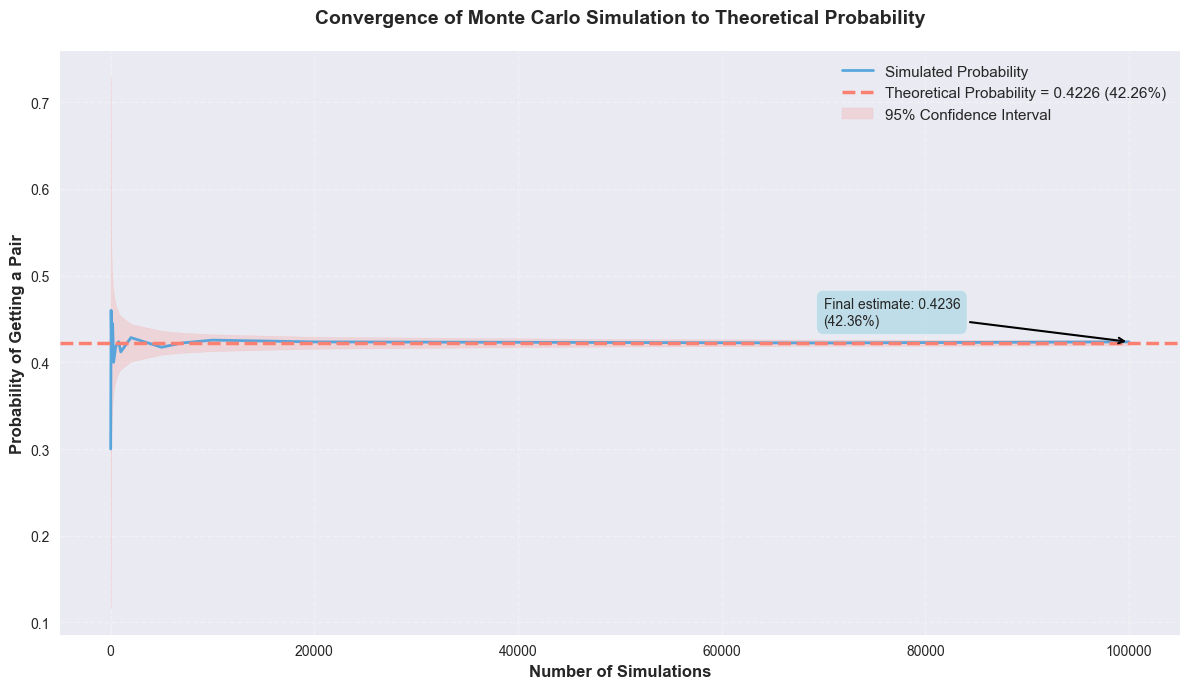

In [39]:
# Create plot
plt.figure(figsize=(12, 7))
    
# Plot simulated probability
plt.plot(sim_counts, probabilities, 
             color='#3498db', linewidth=2, 
             label='Simulated Probability', alpha=0.8)
    
# Plot theoretical probability as dashed line
plt.axhline(y=theoretical_probability, 
                color='#FA8072', linestyle='--', linewidth=2.5,
                label=f'Theoretical Probability = {theoretical_probability:.4f} (42.26%)')
    
# Add confidence bands (optional - shows ±1 standard error)
std_errors = [np.sqrt(theoretical_probability * (1 - theoretical_probability) / n) 
                  for n in sim_counts]
upper_bound = [theoretical_probability + 1.96 * se for se in std_errors]
lower_bound = [theoretical_probability - 1.96 * se for se in std_errors]
    
plt.fill_between(sim_counts, lower_bound, upper_bound, 
                     color='#FA8072', alpha=0.2, 
                     label='95% Confidence Interval')
    
# Formatting
plt.xlabel('Number of Simulations', fontsize=12, fontweight='bold')
plt.ylabel('Probability of Getting a Pair', fontsize=12, fontweight='bold')
plt.title('Convergence of Monte Carlo Simulation to Theoretical Probability', 
              fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='best', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
    
# Add annotation at final point
final_prob = probabilities[-1]
plt.annotate(f'Final estimate: {final_prob:.4f}\n({final_prob*100:.2f}%)',
                xy=(sim_counts[-1], final_prob),
                xytext=(sim_counts[-1]*0.7, final_prob + 0.02),
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))
    
plt.tight_layout()
plt.show()

## Common Mistakes in Counting

<div class="alert alert-danger">
<h4>⚠️ Common Mistakes in Counting</h4>
<ul>
<li><strong>Order confusion:</strong> Forgetting whether order matters (arrangements vs combinations)</li>
<li><strong>Repetition oversight:</strong> Not considering if elements can be reused</li>
<li><strong>Overcounting:</strong> Counting the same outcome multiple times</li>
<li><strong>Missing constraints:</strong> Ignoring problem-specific restrictions</li>
<li><strong>Wrong principle:</strong> Using multiplication when addition is needed, or vice versa</li>
</ul>
</div>

## Applications in Machine Learning

<div class="alert alert-secondary">
<h4>🤖 ML Application: Hyperparameter Grid Search</h4>
<p>A machine learning engineer at Netflix needs to optimize a recommendation model with the following hyperparameters:</p>
<ul>
<li>Learning rate: [0.001, 0.01, 0.1] (3 options)</li>
<li>Batch size: [32, 64, 128, 256] (4 options)</li>
<li>Hidden layers: [2, 3, 4, 5] (4 options)</li>
<li>Dropout rate: [0.1, 0.2, 0.3, 0.4, 0.5] (5 options)</li>
<li>Optimizer: ['Adam', 'SGD', 'RMSprop'] (3 options)</li>
</ul>
<p><strong>Challenge:</strong> How many total configurations need to be tested in a complete grid search?</p>
</div>

In [40]:
# Calculate hyperparameter combinations
hyperparams = {
    'learning_rate': 3,
    'batch_size': 4,
    'hidden_layers': 4,
    'dropout_rate': 5,
    'optimizer': 3
}

total_configs = 1
for param, options in hyperparams.items():
    total_configs *= options
    print(f"{param}: {options} options")

print(f"\nTotal configurations: {' × '.join(map(str, hyperparams.values()))} = {total_configs:,}")

learning_rate: 3 options
batch_size: 4 options
hidden_layers: 4 options
dropout_rate: 5 options
optimizer: 3 options

Total configurations: 3 × 4 × 4 × 5 × 3 = 720


<div class="alert alert-warning">
<h4>💡 Key Insight: Curse of Dimensionality</h4>
<p>As the number of hyperparameters increases, the search space grows exponentially. This is why techniques like random search, Bayesian optimization, and genetic algorithms are often preferred over exhaustive grid search.</p>
</div>

<div class="alert alert-primary">
<h4>🤖 ML Application: Feature Engineering</h4>
<p><strong>Polynomial Features:</strong> When creating polynomial features of degree <em>d</em> from <em>n</em> original features, we need to count the number of resulting features.</p>
<p>In general case:

$$\left(\begin{matrix}n + d \\ d\end{matrix}\right)$$
</p>

<em>Note:</em> sometimes, the intercept term (degree = 0) is not counted, in this case the formula becomes:

$$\left(\begin{matrix}n + d \\ d\end{matrix}\right) - 1$$

<p>For degree 2 with <em>n</em> original features, we get the following number of polynomial features:

$$C(n+d,d) = C(2+2, 2) = C(4, 2) = 6$$
</p>
This corresponds to: `1`, `a`, `b`, `ab`, `a^2`, `b^2`. 
<p>This counting helps us understand computational complexity and memory requirements.</p>
</div>

Note that this is actually a combinations with repetition problem - we're choosing which features to multiply together (with repetition allowed, e.g. $a^2$ uses $a$ twice).



In [41]:
d = 3
n = 5
# calculate the number of polynomial features
combinations_count(n+d, d)

56.0

If we want to calculate the number of polynomial features with the detail for each degree up to the given degree, we can use combinations with repetition:

In [42]:
def count_polynomial_features(n_features, degree):
    """Count number of polynomial features up to given degree"""
    total_features = 0
    for d in range(degree + 1):
        if d == 0:
            features_degree_d = 1
        else:
            # Features of degree d: combinations with repetition
            features_degree_d = combinations_with_repetition_count(n_features, d)
        total_features += features_degree_d
        print(f"Degree {d}: {features_degree_d} features")
        
    return total_features

In [43]:
polynom_features_count = count_polynomial_features(n, d)
print(f"Total polynomial features up to degree {d}: {polynom_features_count}")

Degree 0: 1 features
Degree 1: 5.0 features
Degree 2: 15.0 features
Degree 3: 35.0 features
Total polynomial features up to degree 3: 56.0


## Key Takeaways

<div class="alert alert-summary">
<h4>📋 Key Takeaways</h4>
<ol>
<li><strong>Order matters:</strong> Use permutations/arrangements when sequence is important</li>
<li><strong>Order doesn't matter:</strong> Use combinations when only selection matters</li>
<li><strong>Repetition allowed:</strong> Elements can be reused in the selection</li>
<li><strong>Fundamental counting principle:</strong> Multiply possibilities for independent choices</li>
<li><strong>Real-world applications:</strong> Counting appears everywhere in ML - from hyperparameter optimization to feature engineering</li>
</ol>
</div>